---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [106]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import re
import matplotlib.pyplot as plt
%matplotlib notebook


# This is the set of employees
# employees = set(['Pablo',
#                  'Lee',
#                  'Georgia',
#                  'Vincent',
#                  'Andy',
#                  'Frida',
#                  'Joan',
#                  'Claude'])

# This is the set of movies
# movies = set(['The Shawshank Redemption',
#               'Forrest Gump',
#               'The Matrix',
#               'Anaconda',
#               'The Social Network',
#               'The Godfather',
#               'Monty Python and the Holy Grail',
#               'Snakes on a Plane',
#               'Kung Fu Panda',
#               'The Dark Knight',
#               'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [107]:
#!cat Employee_Relationships.txt

In [108]:
#!cat Employee_Movie_Choices.txt

In [109]:
# names = []
# movies = []
# my_str = ''
# with open('Employee_Movie_Choices.txt', 'r') as f:
#     line = f.readline()
#     while line:
#         list_of_movies = re.findall(r'[\w]+', line)
#         print(list_of_movies)
#         for el in list_of_movies:
#             if list_of_movies.index(el) == 0:
#                 names.append(el)
#             else:
#                 if len(line) == 2:
#                     movies.append(el)
# #                 else:
# #                     my_str = my_str + ' ' + el
# #                     if (len(line) == (line.index(el) + 1)):
# #                         my_str = ''
#         line = f.readline()
# print('Movies', movies)                        
# print('Names', names)

                        
                        
    

In [110]:
# names = []
# movies = []
# with open('Employee_Movie_Choices.txt', 'r') as f:
#     line = f.readline()
#     while line:
#         list_of_movies = re.findall(r'[\w]+', line)
#         print(list_of_movies)
#         for el in list_of_movies:
#             if (len(line) == 2):
#                 names.append(list_of_movies.index(0))
#                 movies.append(list_of_movies.index(1))
#                 line = f.readline()
#             else:
#                 if (list_of_movies.index(el) == 0):
#                     names.append(el)
#                 else:
#                     movies.append(el)
#         line = f.readline()
# print('Movies', movies)
# print('Names', names)

<IPython.core.display.Javascript object>


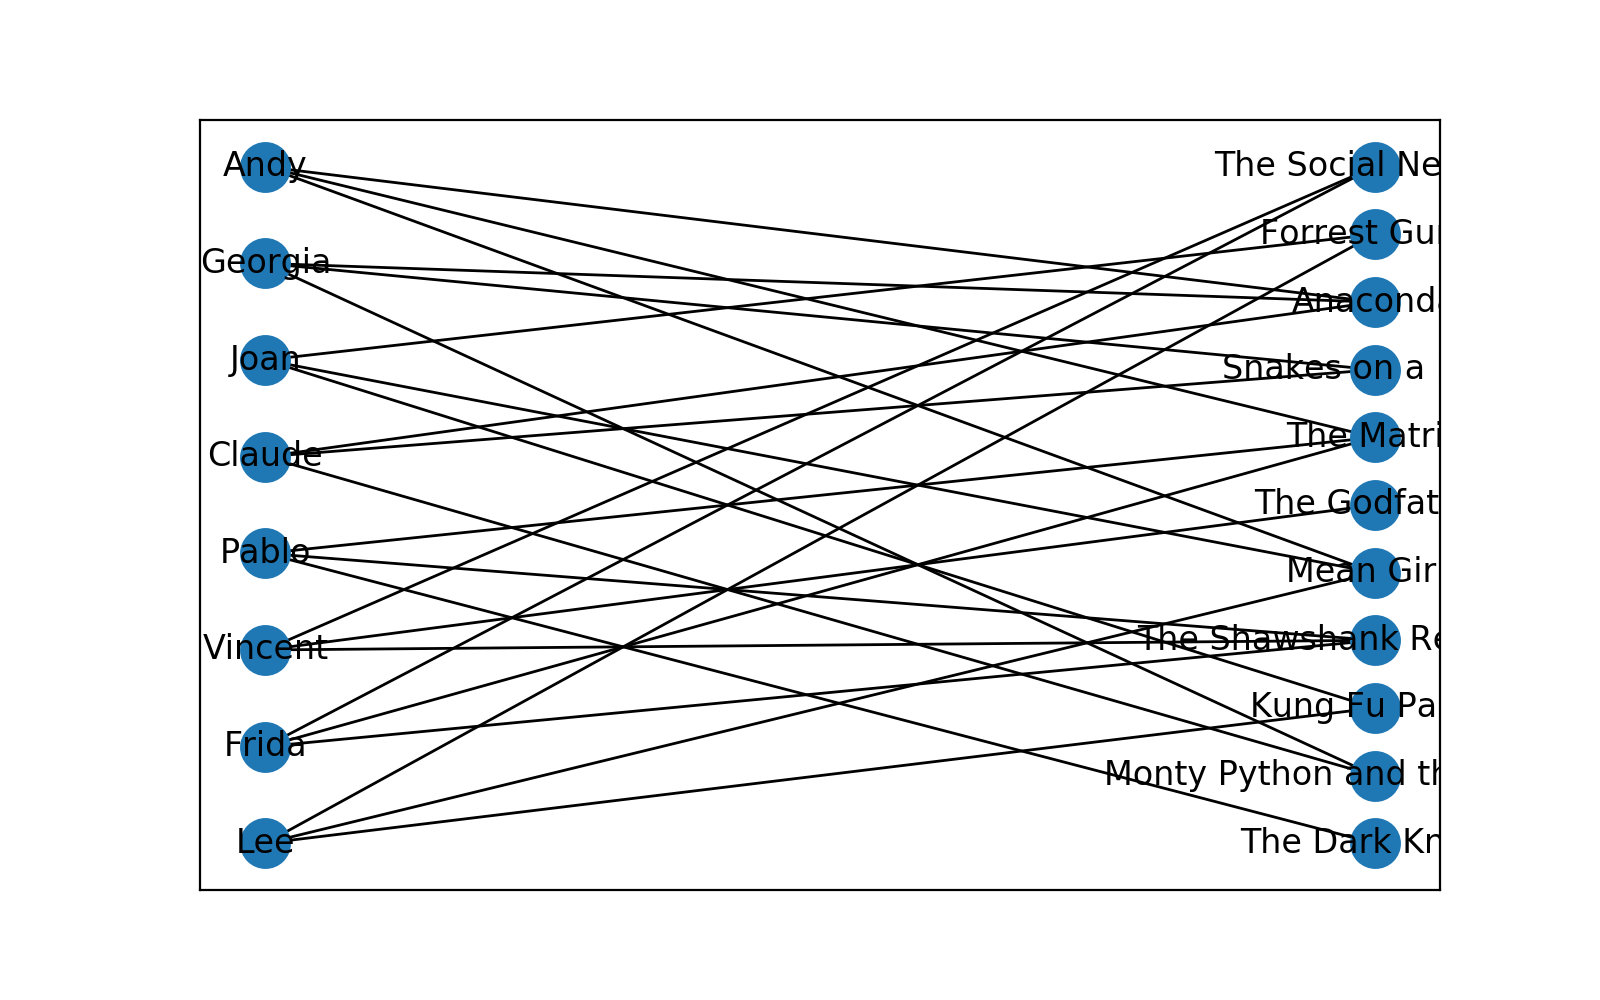

19 24


In [112]:
def answer_one():
    G = nx.Graph()
    
    employees = set(['Andy', 'Claude', 'Frida', 'Georgia', 'Joan', 'Lee', 'Pablo', 'Vincent'])
    movies = set(['Anaconda', 'Mean Girls', 'The Matrix', 'Monty Python and the Holy Grail',
              'Snakes on a Plane', 'The Shawshank Redemption', 'The Social Network',
              'Forrest Gump', 'Kung Fu Panda', 'The Dark Knight', 'The Godfather'])
                  
    G.add_nodes_from(employees, bipartite=0)
    G.add_nodes_from(movies, bipartite=1)
    G.add_edges_from([('Andy', 'Anaconda'), ('Andy', 'Mean Girls'), ('Andy','The Matrix'),
                      ('Claude', 'Anaconda'), ('Claude', 'Monty Python and the Holy Grail'),
                      ('Claude', 'Snakes on a Plane'),('Frida', 'The Matrix'),
                      ('Frida', 'The Shawshank Redemption'), ('Frida', 'The Social Network'),
                      ('Georgia', 'Anaconda'), ('Georgia', 'Monty Python and the Holy Grail'),
                      ('Georgia', 'Snakes on a Plane'), ('Joan', 'Forrest Gump'), ('Joan', 'Kung Fu Panda'),
                      ('Joan', 'Mean Girls'),('Lee', 'Forrest Gump'),('Lee', 'Kung Fu Panda'),
                      ('Lee', 'Mean Girls') ,('Pablo', 'The Dark Knight'), ('Pablo', 'The Matrix'),
                      ('Pablo', 'The Shawshank Redemption'), ('Vincent', 'The Godfather'),
                      ('Vincent', 'The Shawshank Redemption') ,('Vincent', 'The Social Network')     
                      ])
    plt.figure(figsize=(8,5))
    nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, employees))
    print(len(G.nodes), len(G.edges))    
answer_one()    

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [113]:
def answer_two():
    G = nx.Graph()
    
    employees = ['Andy', 'Claude', 'Frida', 'Georgia', 'Joan', 'Lee', 'Pablo', 'Vincent']
    movies = ['Anaconda', 'Mean Girls', 'The Matrix', 'Monty Python and the Holy Grail',
              'Snakes on a Plane', 'The Shawshank Redemption', 'The Social Network',
              'Forrest Gump', 'Kung Fu Panda', 'The Dark Knight', 'The Godfather']
                  
    G.add_nodes_from(employees, bipartite=0)
    G.add_nodes_from(movies, bipartite=1)
    G.add_edges_from([('Andy', 'Anaconda'), ('Andy', 'Mean Girls'), ('Andy','The Matrix'),
                      ('Claude', 'Anaconda'), ('Claude', 'Monty Python and the Holy Grail'),
                      ('Claude', 'Snakes on a Plane'),('Frida', 'The Matrix'),
                      ('Frida', 'The Shawshank Redemption'), ('Frida', 'The Social Network'),
                      ('Georgia', 'Anaconda'), ('Georgia', 'Monty Python and the Holy Grail'),
                      ('Georgia', 'Snakes on a Plane'), ('Joan', 'Forrest Gump'), ('Joan', 'Kung Fu Panda'),
                      ('Joan', 'Mean Girls'),('Lee', 'Forrest Gump'),('Lee', 'Kung Fu Panda'),
                      ('Lee', 'Mean Girls') ,('Pablo', 'The Dark Knight'), ('Pablo', 'The Matrix'),
                      ('Pablo', 'The Shawshank Redemption'), ('Vincent', 'The Godfather'),
                      ('Vincent', 'The Shawshank Redemption') ,('Vincent', 'The Social Network')     
                      ])

    for name in employees:
        G.nodes[name]['type'] = 'employee'
    
    for movie in movies:
        G.nodes[movie]['type'] = 'movie'
  
    #([G.node(data = True)[name] for name in employees])
    return G.nodes(data = True)

answer_two()

NodeDataView({'Andy': {'bipartite': 0, 'type': 'employee'}, 'Claude': {'bipartite': 0, 'type': 'employee'}, 'Frida': {'bipartite': 0, 'type': 'employee'}, 'Georgia': {'bipartite': 0, 'type': 'employee'}, 'Joan': {'bipartite': 0, 'type': 'employee'}, 'Lee': {'bipartite': 0, 'type': 'employee'}, 'Pablo': {'bipartite': 0, 'type': 'employee'}, 'Vincent': {'bipartite': 0, 'type': 'employee'}, 'Anaconda': {'bipartite': 1, 'type': 'movie'}, 'Mean Girls': {'bipartite': 1, 'type': 'movie'}, 'The Matrix': {'bipartite': 1, 'type': 'movie'}, 'Monty Python and the Holy Grail': {'bipartite': 1, 'type': 'movie'}, 'Snakes on a Plane': {'bipartite': 1, 'type': 'movie'}, 'The Shawshank Redemption': {'bipartite': 1, 'type': 'movie'}, 'The Social Network': {'bipartite': 1, 'type': 'movie'}, 'Forrest Gump': {'bipartite': 1, 'type': 'movie'}, 'Kung Fu Panda': {'bipartite': 1, 'type': 'movie'}, 'The Dark Knight': {'bipartite': 1, 'type': 'movie'}, 'The Godfather': {'bipartite': 1, 'type': 'movie'}})

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


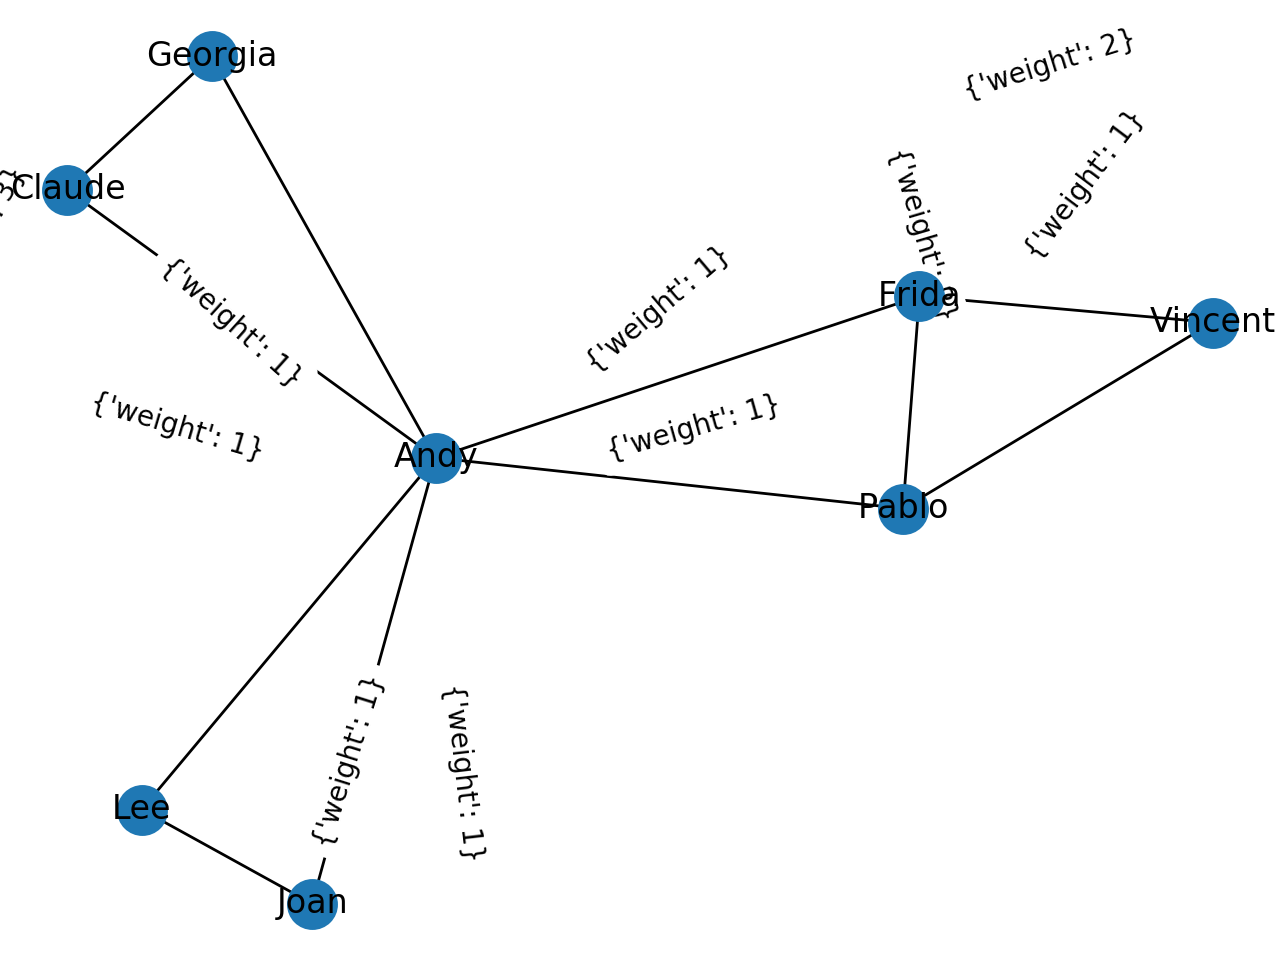

Lee  Frida  Vincent  Pablo  Claude  Joan  Georgia  Andy
Lee      0.0    0.0      0.0    0.0     0.0   3.0      0.0   1.0
Frida    0.0    0.0      2.0    2.0     0.0   0.0      0.0   1.0
Vincent  0.0    2.0      0.0    1.0     0.0   0.0      0.0   0.0
Pablo    0.0    2.0      1.0    0.0     0.0   0.0      0.0   1.0
Claude   0.0    0.0      0.0    0.0     0.0   0.0      3.0   1.0
Joan     3.0    0.0      0.0    0.0     0.0   0.0      0.0   1.0
Georgia  0.0    0.0      0.0    0.0     3.0   0.0      0.0   1.0
Andy     1.0    1.0      0.0    1.0     1.0   1.0      1.0   0.0

In [117]:
def graph():
    G = nx.Graph()
    
    employees = ['Andy', 'Claude', 'Frida', 'Georgia', 'Joan', 'Lee', 'Pablo', 'Vincent']
    movies = ['Anaconda', 'Mean Girls', 'The Matrix', 'Monty Python and the Holy Grail',
              'Snakes on a Plane', 'The Shawshank Redemption', 'The Social Network',
              'Forrest Gump', 'Kung Fu Panda', 'The Dark Knight', 'The Godfather']
                  
    G.add_nodes_from(employees, bipartite=0)
    G.add_nodes_from(movies, bipartite=1)
    G.add_edges_from([('Andy', 'Anaconda'), ('Andy', 'Mean Girls'), ('Andy','The Matrix'),
                      ('Claude', 'Anaconda'), ('Claude', 'Monty Python and the Holy Grail'),
                      ('Claude', 'Snakes on a Plane'),('Frida', 'The Matrix'),
                      ('Frida', 'The Shawshank Redemption'), ('Frida', 'The Social Network'),
                      ('Georgia', 'Anaconda'), ('Georgia', 'Monty Python and the Holy Grail'),
                      ('Georgia', 'Snakes on a Plane'), ('Joan', 'Forrest Gump'), ('Joan', 'Kung Fu Panda'),
                      ('Joan', 'Mean Girls'),('Lee', 'Forrest Gump'),('Lee', 'Kung Fu Panda'),
                      ('Lee', 'Mean Girls') ,('Pablo', 'The Dark Knight'), ('Pablo', 'The Matrix'),
                      ('Pablo', 'The Shawshank Redemption'), ('Vincent', 'The Godfather'),
                      ('Vincent', 'The Shawshank Redemption') ,('Vincent', 'The Social Network')     
                      ])

    for name in employees:
        G.nodes[name]['type'] = 'employee'
    
    for movie in movies:
        G.nodes[movie]['type'] = 'movie'

    return G

def answer_three():
    G = graph()
    weighted_projection = bipartite.weighted_projected_graph(G, employees)
#     for edge in sorted(G.edges(data=True)):
#         print(edge)   
    
    nx.draw(weighted_projection, pos = nx.spring_layout(weighted_projection), with_labels=True)
    nx.draw_networkx_edge_labels(weighted_projection, pos = nx.spring_layout(weighted_projection))
    return nx.to_pandas_adjacency(weighted_projection)
answer_three()     

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [119]:
def answer_four():
    G = graph()
    weighted_projection = bipartite.weighted_projected_graph(G, employees)
    return nx.to_pandas_adjacency(weighted_projection).corr()

answer_four()

Lee     Frida   Vincent     Pablo    Claude      Joan   Georgia  \
Lee      1.000000 -0.218797 -0.269408 -0.176777 -0.125000 -0.125000 -0.125000   
Frida   -0.218797  1.000000  0.026198  0.103142 -0.218797 -0.218797 -0.218797   
Vincent -0.269408  0.026198  1.000000  0.635001 -0.269408 -0.269408 -0.269408   
Pablo   -0.176777  0.103142  0.635001  1.000000 -0.176777 -0.176777 -0.176777   
Claude  -0.125000 -0.218797 -0.269408 -0.176777  1.000000 -0.125000 -0.125000   
Joan    -0.125000 -0.218797 -0.269408 -0.176777 -0.125000  1.000000 -0.125000   
Georgia -0.125000 -0.218797 -0.269408 -0.176777 -0.125000 -0.125000  1.000000   
Andy     0.000000 -0.589506  0.311086 -0.408248  0.000000  0.000000  0.000000   

             Andy  
Lee      0.000000  
Frida   -0.589506  
Vincent  0.311086  
Pablo   -0.408248  
Claude   0.000000  
Joan     0.000000  
Georgia  0.000000  
Andy     1.000000